In [2]:

import os
current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, '../../../1. Explorative Analysis & Preprocessing/nasiba/'))
os.chdir(src_path) 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from textblob import TextBlob
import nltk
import re
import string
import emoji

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from collections import Counter
from spellchecker import SpellChecker

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import os
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from textblob import Word, TextBlob
pd.set_option('display.max_colwidth', None)
spell = SpellChecker()


In [4]:


filepath_name = os.path.abspath(os.path.join(src_path, 'data/train_cleaned.csv'))

df_cleaned = pd.read_csv(filepath_name, encoding='utf-8')
df_cleaned.head()

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father selfish drag kid run,1,['#run'],NaN
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer van,2,"['#lyft', '#disapointed', '#getthanked']",NaN
2,3,0,bihday your majesty,bihday majesty,0,[],NaN
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model take time mobile phone kissing sunglass mouth tongue sweat droplet sweat droplet sweat droplet,0,['#model'],":mobile_phone:,:kissing_face_with_smiling_eyes:,:smiling_face_with_sunglasses:,:mouth:,:tongue:,:sweat_droplets:,:sweat_droplets:,:sweat_droplets:"
4,5,0,factsguide: society now #motivation,factsguide society motivation,0,['#motivation'],NaN


In [ ]:
print(df_origin.tweet.count())
print(df_cleaned.tweet.count())
print(df_cleaned.tweet.count() - df_origin.tweet.count())
print((df_cleaned.tweet.count() / df_origin.tweet.count() - 1) * 100)

In [ ]:
print(df_origin[df_origin.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count() - df_origin[df_origin.label == 1].count())
print((df_cleaned[df_cleaned.label == 1].count() / df_origin[df_origin.label == 1].count() - 1) * 100)

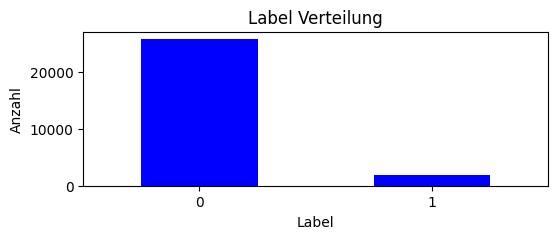

In [4]:
label_counts = df_cleaned['label'].value_counts()

plt.figure(figsize=(6,2))
label_counts.plot(kind='bar', color='blue')
plt.title('Label Verteilung')
plt.xlabel('Label')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.show()

In [5]:
df_analyse_label_0= df_cleaned[df_cleaned['label']==0]
df_analyse_label_1= df_cleaned[df_cleaned['label']==1]

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\1678384975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_0['tweet_cleaned'] = df_analyse_label_0['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')


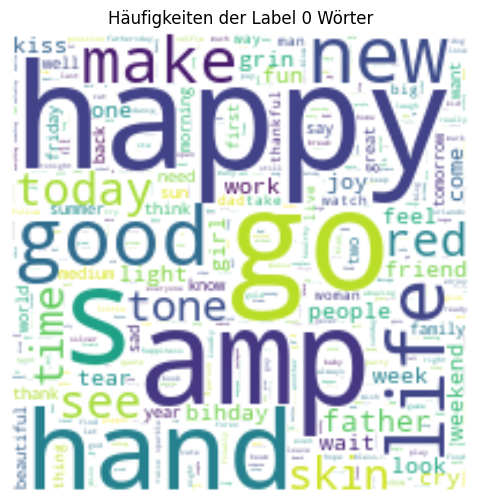

In [7]:
df_analyse_label_0['tweet_cleaned'] = df_analyse_label_0['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_0['tweet_cleaned'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 0 Wörter")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\3443010156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_1['tweet_cleaned'] = df_analyse_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')


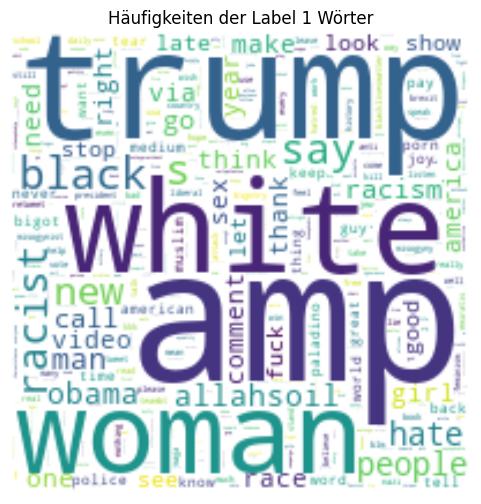

In [8]:
df_analyse_label_1['tweet_cleaned'] = df_analyse_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_1['tweet_cleaned'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 1 Wörter")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\1601303686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_0['hashtags'] = df_analyse_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')


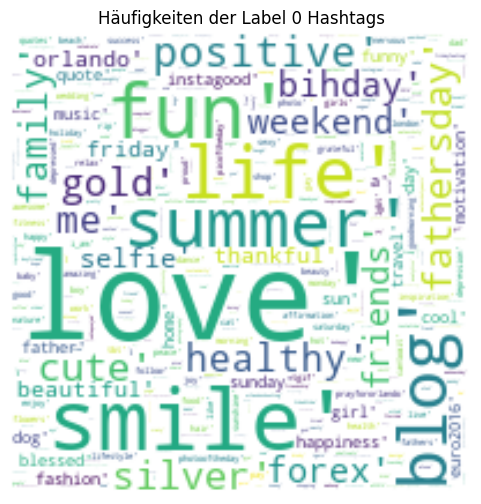

In [9]:
df_analyse_label_0['hashtags'] = df_analyse_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_0['hashtags'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 0 Hashtags")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\2497192674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_1['hashtags'] = df_analyse_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')


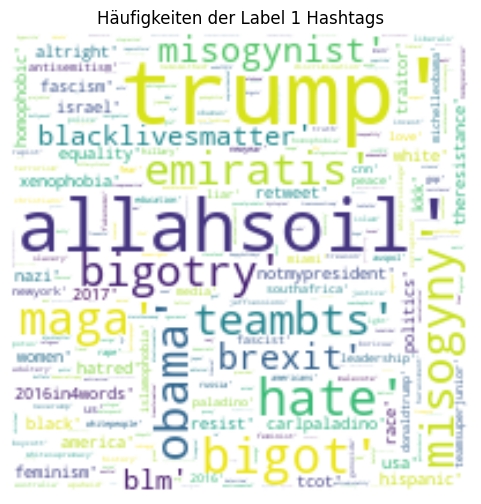

In [10]:
df_analyse_label_1['hashtags'] = df_analyse_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_1['hashtags'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 1 Hashtags")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\2898506794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_0['tweet'] = df_analyse_label_0['tweet'].apply(lambda x: x if isinstance(x, str) else '')


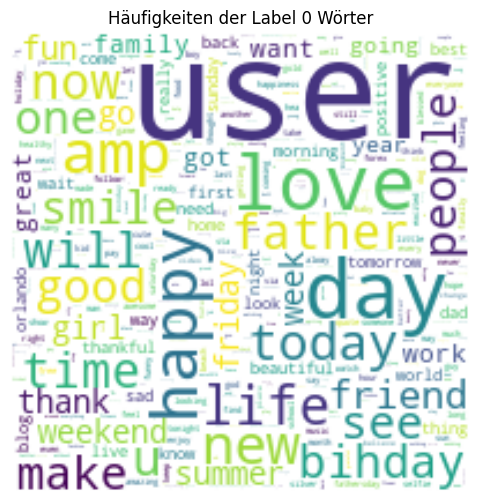

In [11]:
df_analyse_label_0['tweet'] = df_analyse_label_0['tweet'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_0['tweet'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 0 Wörter")
plt.show()

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_18272\2446552789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse_label_1['tweet'] = df_analyse_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')


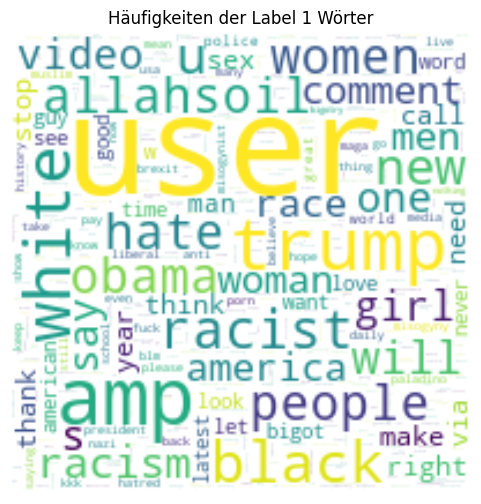

In [12]:
df_analyse_label_1['tweet'] = df_analyse_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')
text = " ".join(tweet for tweet in df_analyse_label_1['tweet'])

wc = WordCloud(background_color="white",
               width=200, 
               height=200,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=False,
               min_font_size=1)

wc.generate(text)


plt.figure(figsize=[6, 6])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Häufigkeiten der Label 1 Wörter")
plt.show()

In [ ]:
freq_words = pd.Series(' '.join(df_raw['tweet']).split()).value_counts()[:10]

words = freq_words.index
counts = freq_words.values
plt.figure(figsize=(8, 2)) 
plt.bar(words, counts, color='skyblue') 

plt.xticks(rotation=20)
plt.tight_layout()  
plt.show()